In [13]:
# NAIVE BAYES CLASSIFIER FROM SCRACTCH 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [15]:
sns.set_style("darkgrid")

In [16]:
class Naive_Bayes_Classifier():
    # posterior probability = (likelihood * prior probability)/ Marginal Probability
    
    def gaussian_density_function(self, index, x):
        #  (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is standard deviation
        # Under the assumption that each class is normally distributed
        
        mean = self.mean[index]
        variance = self.variance[index]
        
        # Try later
        # mu, sigma = 0, 0.1 # mean and standard deviation
        # s = np.random.normal(mu, sigma, 1000)
        
        numerator = np.exp((-1/2) * ((x-mean)**2) / (2*variance))
        denominator = np.sqrt(2*np.pi*variance)
        probability = numerator/denominator
        return probability #
    
    def compute_mean_variance(self, features, labels):
        
        self.mean = features.groupby(labels).apply(np.mean).to_numpy()
        self.variance = features.groupby(labels).apply(np.var).to_numpy()
        
        return self.mean, self.variance
    
    def compute_prior_probability(self, features, labels):
        
        self.prior_prob = (features.groupby( labels ).apply( lambda x: len(x) ) /self.rows).to_numpy()
        return self.prior_prob
    
    def compute_posterior_probability(self, x):
        posterior_probabilities = []
        
        for i in range(self.distinct_classes):
            prior_prob = np.log(self.prior_prob[i])
            conditional_prob = np.sum(np.log(self.gaussian_density_function(i, x)))
            posterior_prob = prior_prob + conditional_prob
            posterior_probabilities.append(posterior_prob)
        return self.classes[ np.argmax(posterior_probabilities)]
    
    def training(self, features, labels):
        
        self.classes = np.unique(labels)
        self.distinct_classes = len(self.classes)
        self._num_of_features = features.shape[1]
        self.rows = features.shape[0]
        
        #computing mean and variance
        self.compute_mean_variance(features, labels)
        
        #computing prior probabilities
        self.compute_prior_probability(features, labels)
        
    def predicting(self, features):
        
        predictions = [self.compute_posterior_probability(i) for i in features.to_numpy()]
        return predictions
    
    
    def accuracy(self, actual_labels, predicted_labels):
        count = len(actual_labels)
        accuracy = np.sum(actual_labels == predicted_labels) / count
        return accuracy
    
    def plotting(self, actual_labels, predicted_labels, label_name ):
        
        act_labels = pd.DataFrame(data = actual_labels, columns = [label_name])
        pred_labels = pd.DataFrame(data = predicted_labels, columns = [label_name])
        
        figure, axis = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
        
        sns.countplot(x = label_name, data = act_labels, ax = axis[0], palette = 'viridis', alpha = 0.7, hue = label_name, dodge = False)
        sns.countplot(x = label_name, data = pred_labels, ax = axis[1], palette = 'viridis', alpha = 0.7, hue = label_name, dodge = False)
        
        figure.suptitle('Actual Labels vs Predicted Labels Comparison', fontsize=20)

        axis[0].tick_params(labelsize=12)
        axis[0].set_title(" Actual Labels ", fontsize=18)
        axis[1].tick_params(labelsize=12)
        axis[1].set_title(" Predicted Labels ", fontsize=18)
        plt.show()
        

In [17]:
# Preparing our dataset 

dataset = pd.read_csv("iris.csv")
data = dataset.sample(frac=1, random_state=1).reset_index(drop=True) # shuffling our dataset with sample
features, labels = data.iloc[:, :-1], data.iloc[:, -1]
train_features, test_features, train_labels, test_labels = features[:100], features[100:], labels[:100], labels[100:]

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

In [18]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.8,4.0,1.2,0.2,Setosa
1,5.1,2.5,3.0,1.1,Versicolor
2,6.6,3.0,4.4,1.4,Versicolor
3,5.4,3.9,1.3,0.4,Setosa
4,7.9,3.8,6.4,2.0,Virginica
5,6.3,3.3,4.7,1.6,Versicolor
6,6.9,3.1,5.1,2.3,Virginica
7,5.1,3.8,1.9,0.4,Setosa
8,4.7,3.2,1.6,0.2,Setosa
9,6.9,3.2,5.7,2.3,Virginica


In [19]:
# train the model
model = Naive_Bayes_Classifier()
model.training(train_features, train_labels)

In [20]:
model.compute_prior_probability(train_features, train_labels)

array([0.31, 0.32, 0.37])

In [21]:
predictions = model.predicting(test_features)

In [22]:
model.accuracy(test_labels, predictions)

0.92

In [23]:
test_labels.value_counts(normalize=True)

Setosa        0.38
Versicolor    0.36
Virginica     0.26
Name: variety, dtype: float64

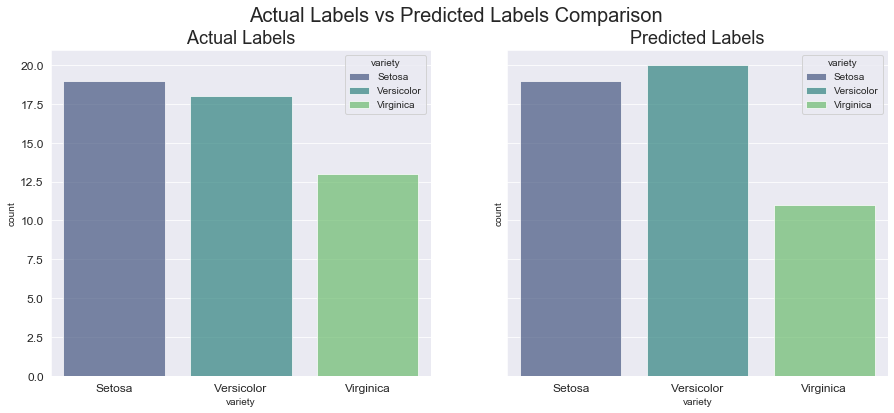

In [24]:
model.plotting(test_labels, predictions, 'variety')